In [56]:
from sklearn.datasets import load_breast_cancer
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns
import tensorflow as tf
from tensorflow import keras

### CSV 파일 불러오기

In [216]:
df = pd.read_csv("diabetes.csv")
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


# 1. 당뇨병 데이터를 가지고 머신러닝 5가지 분류를 수행.

### 데이터 전처리

In [217]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

Text(0.5, 1.0, 'Label')

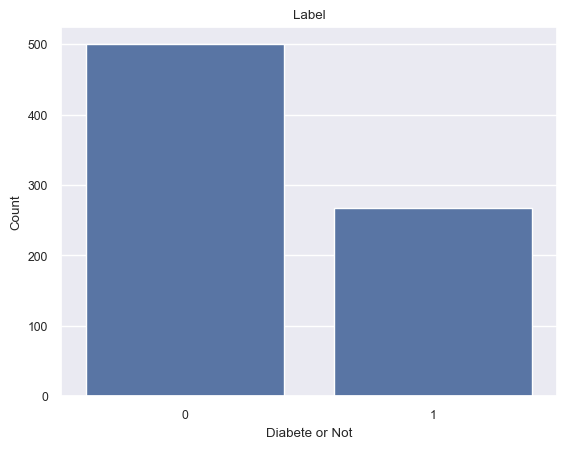

In [218]:
sns.countplot(data = df, x="Outcome")
plt.xlabel("Diabete or Not")
plt.ylabel("Count")
plt.title("Label")

In [219]:
df['Outcome'].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

In [220]:
(df == 0).sum()

Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64

In [221]:
cols_to_check = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI',
       'DiabetesPedigreeFunction', 'Age']
df = df[df[cols_to_check].ne(0).all(axis=1)]
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
6,3,78,50,32,88,31.0,0.248,26,1
8,2,197,70,45,543,30.5,0.158,53,1
13,1,189,60,23,846,30.1,0.398,59,1
...,...,...,...,...,...,...,...,...,...
753,0,181,88,44,510,43.3,0.222,26,1
755,1,128,88,39,110,36.5,1.057,37,1
760,2,88,58,26,16,28.4,0.766,22,0
763,10,101,76,48,180,32.9,0.171,63,0


In [222]:
(df == 0).sum()

Pregnancies                  56
Glucose                       0
BloodPressure                 0
SkinThickness                 0
Insulin                       0
BMI                           0
DiabetesPedigreeFunction      0
Age                           0
Outcome                     262
dtype: int64

In [223]:
df['Outcome'].value_counts()

Outcome
0    262
1    130
Name: count, dtype: int64

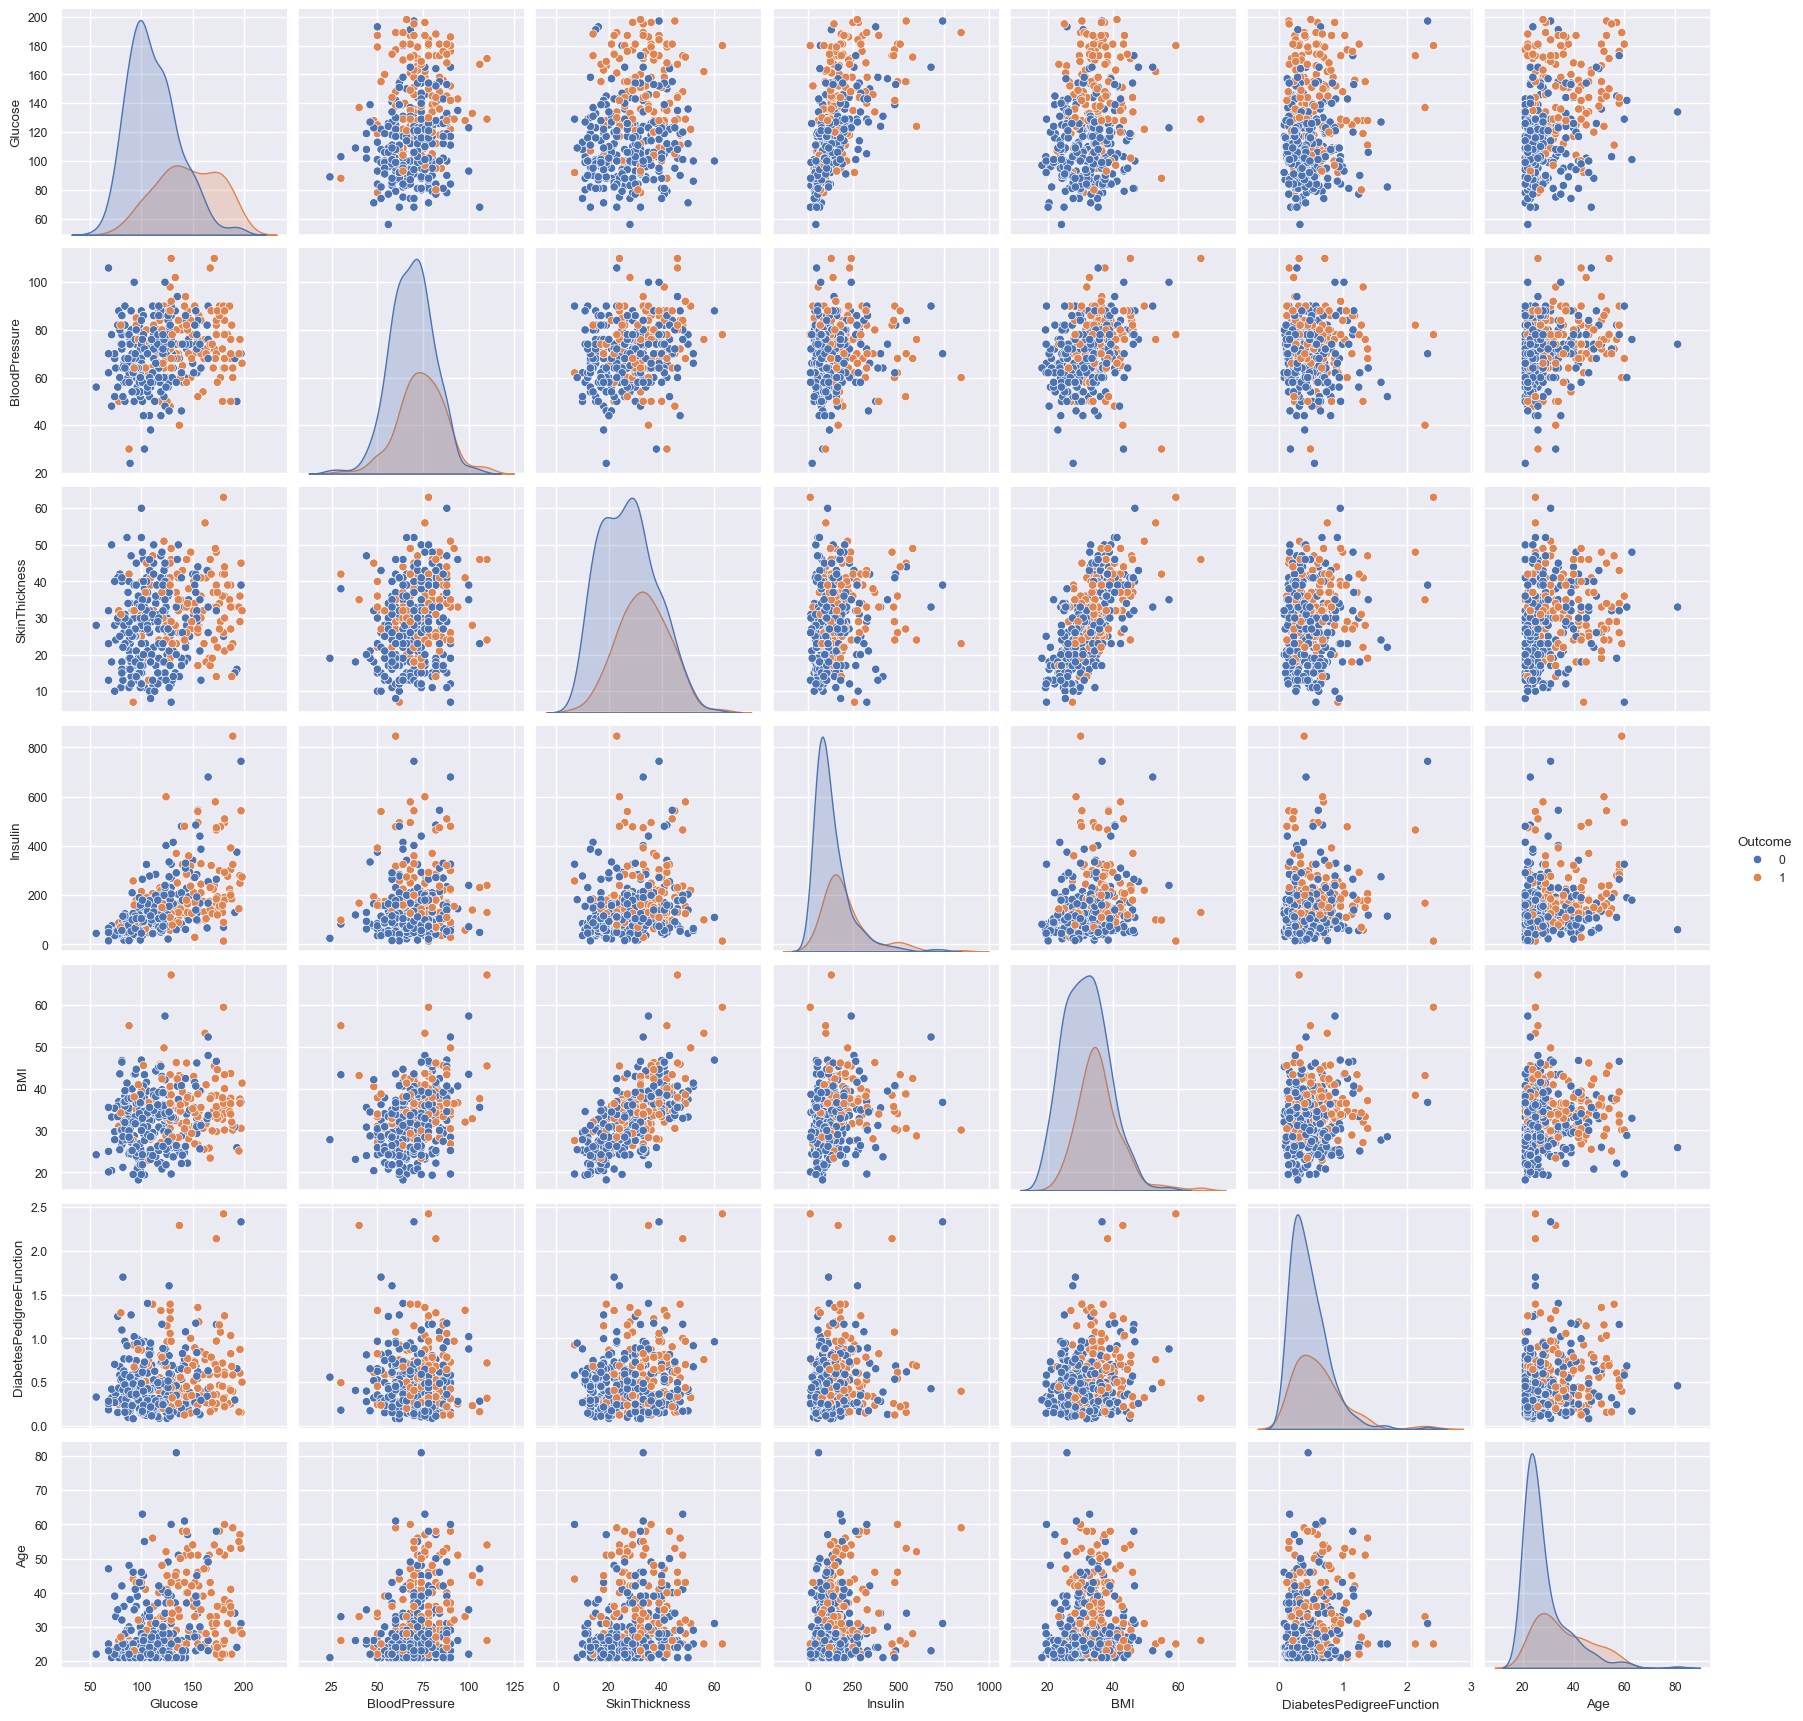

In [224]:
sns.pairplot(df,
             vars=['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI',
       'DiabetesPedigreeFunction', 'Age'],
            hue ='Outcome')
plt.show()

In [225]:
X=df.drop('Outcome',axis=1)
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
6,3,78,50,32,88,31.0,0.248,26
8,2,197,70,45,543,30.5,0.158,53
13,1,189,60,23,846,30.1,0.398,59


In [226]:
y=df['Outcome']

In [227]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.25,random_state=0)

In [228]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import warnings
warnings.filterwarnings('ignore')

### SVM 분류

In [229]:
clf_svm = SVC(random_state=0)
clf_svm.fit(X_train, y_train)

pred_svm = clf_svm.predict(X_test)

print("\n--- SVM Classifier ---")
print(accuracy_score(y_test, pred_svm))
print(confusion_matrix(y_test, pred_svm))


--- SVM Classifier ---
0.7755102040816326
[[60  5]
 [17 16]]


### LR 분류

In [230]:
clf_lr = LogisticRegression(random_state=0)
clf_lr.fit(X_train, y_train)

pred_lr = clf_lr.predict(X_test)

print ("\n--- Logistic Regression Classifier ---")
print (accuracy_score(y_test, pred_lr))
print (confusion_matrix(y_test, pred_lr))


--- Logistic Regression Classifier ---
0.8061224489795918
[[61  4]
 [15 18]]


### KNN 분류

In [231]:
clf_knn = KNeighborsClassifier(n_neighbors=5)
clf_knn.fit(X_train, y_train)
pred_knn = clf_knn.predict(X_test)
print("\n--- KNN Classifier ---")
print(accuracy_score(y_test, pred_knn))
print(confusion_matrix(y_test, pred_knn))


--- KNN Classifier ---
0.7551020408163265
[[57  8]
 [16 17]]


### DT 분류

In [232]:
clf_dt = DecisionTreeClassifier(random_state=0)
clf_dt.fit(X_train, y_train)

pred_dt = clf_dt.predict(X_test)

print ("\n--- Decision Tree Classifier ---")
print (accuracy_score(y_test, pred_dt))
print (confusion_matrix(y_test, pred_dt))


--- Decision Tree Classifier ---
0.7346938775510204
[[53 12]
 [14 19]]


### RF 분류

In [233]:
print ("\n--- Radom Forest ---")
rf_clf = RandomForestClassifier(random_state=0)
rf_clf.fit(X_train, y_train)
pred = rf_clf.predict(X_test)
print(accuracy_score(y_test,pred))
print(confusion_matrix(y_test, pred))



--- Radom Forest ---
0.7959183673469388
[[59  6]
 [14 19]]


## 2. 동일한 데이터로 딥러닝 분류 수행하라. (dense layer 만 사용)

In [234]:
y=df['Outcome']
Y = pd.get_dummies(y).values

In [235]:
X=df.drop('Outcome',axis=1)
X = X.values
X

array([[  1.   ,  89.   ,  66.   , ...,  28.1  ,   0.167,  21.   ],
       [  0.   , 137.   ,  40.   , ...,  43.1  ,   2.288,  33.   ],
       [  3.   ,  78.   ,  50.   , ...,  31.   ,   0.248,  26.   ],
       ...,
       [  2.   ,  88.   ,  58.   , ...,  28.4  ,   0.766,  22.   ],
       [ 10.   , 101.   ,  76.   , ...,  32.9  ,   0.171,  63.   ],
       [  5.   , 121.   ,  72.   , ...,  26.2  ,   0.245,  30.   ]])

In [236]:
X_train,X_test, y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=0) 

In [239]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD,Adam

model = Sequential()

model.add(Dense(10,input_shape=(8,),activation='relu'))
model.add(Dense(8,activation='relu'))
model.add(Dense(6,activation='relu'))
model.add(Dense(2,activation='sigmoid'))

model.compile(Adam(learning_rate=0.0001),'binary_crossentropy',metrics=['accuracy'])

model.summary()

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_64 (Dense)            (None, 10)                90        
                                                                 
 dense_65 (Dense)            (None, 8)                 88        
                                                                 
 dense_66 (Dense)            (None, 6)                 54        
                                                                 
 dense_67 (Dense)            (None, 2)                 14        
                                                                 
Total params: 246
Trainable params: 246
Non-trainable params: 0
_________________________________________________________________


In [240]:
model_history=model.fit(x=X_train, y=y_train, epochs=40, batch_size=32,validation_data= (X_test,y_test))
y_pred = model.predict(X_test)

y_test_class = np.argmax(y_test,axis=1)
y_pred_class = np.argmax(y_pred,axis=1)

Epoch 1/40
10/10 [==============================] - 0s 11ms/step - loss: 8.4014 - accuracy: 0.6645 - val_loss: 6.8262 - val_accuracy: 0.6835
Epoch 2/40
10/10 [==============================] - 0s 3ms/step - loss: 8.2425 - accuracy: 0.6645 - val_loss: 6.6902 - val_accuracy: 0.6835
Epoch 3/40
10/10 [==============================] - 0s 3ms/step - loss: 8.0936 - accuracy: 0.6645 - val_loss: 6.5521 - val_accuracy: 0.6835
Epoch 4/40
10/10 [==============================] - 0s 3ms/step - loss: 7.9355 - accuracy: 0.6645 - val_loss: 6.4259 - val_accuracy: 0.6835
Epoch 5/40
10/10 [==============================] - 0s 3ms/step - loss: 7.7974 - accuracy: 0.6645 - val_loss: 6.2952 - val_accuracy: 0.6835
Epoch 6/40
10/10 [==============================] - 0s 3ms/step - loss: 7.6518 - accuracy: 0.6645 - val_loss: 6.1705 - val_accuracy: 0.6835
Epoch 7/40
10/10 [==============================] - 0s 3ms/step - loss: 7.5135 - accuracy: 0.6645 - val_loss: 6.0470 - val_accuracy: 0.6835
Epoch 8/40
10/10 [=

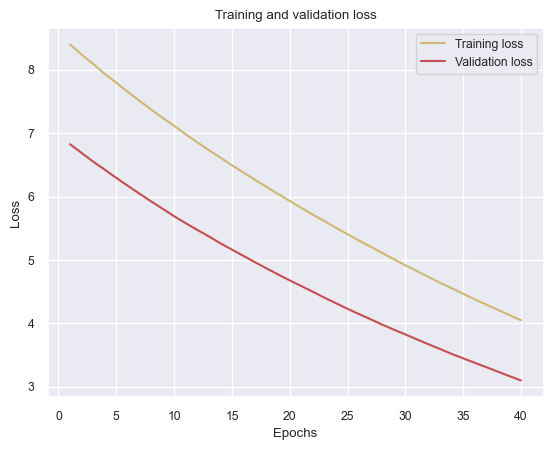

In [241]:
loss =model_history.history['loss']
val_loss =model_history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

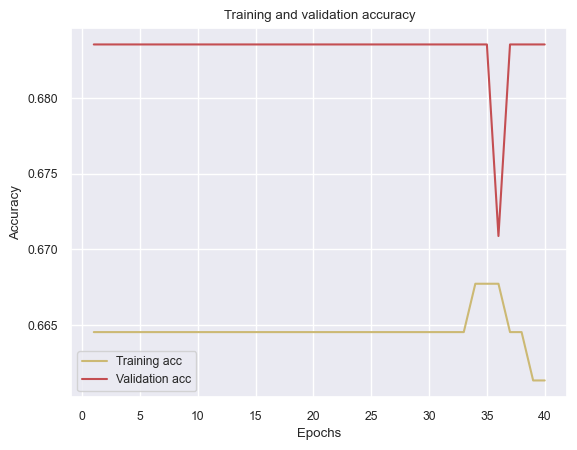

In [242]:
acc =model_history.history['accuracy']
val_acc =model_history.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [243]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test_class,y_pred_class))
print(confusion_matrix(y_test_class,y_pred_class))

              precision    recall  f1-score   support

           0       0.69      1.00      0.82        54
           1       1.00      0.04      0.08        25

    accuracy                           0.70        79
   macro avg       0.85      0.52      0.45        79
weighted avg       0.79      0.70      0.58        79

[[54  0]
 [24  1]]


## 3. 해당 데이터에서 Outcome을 삭제하고 BMI를 예측하는 회귀를 수행하라.

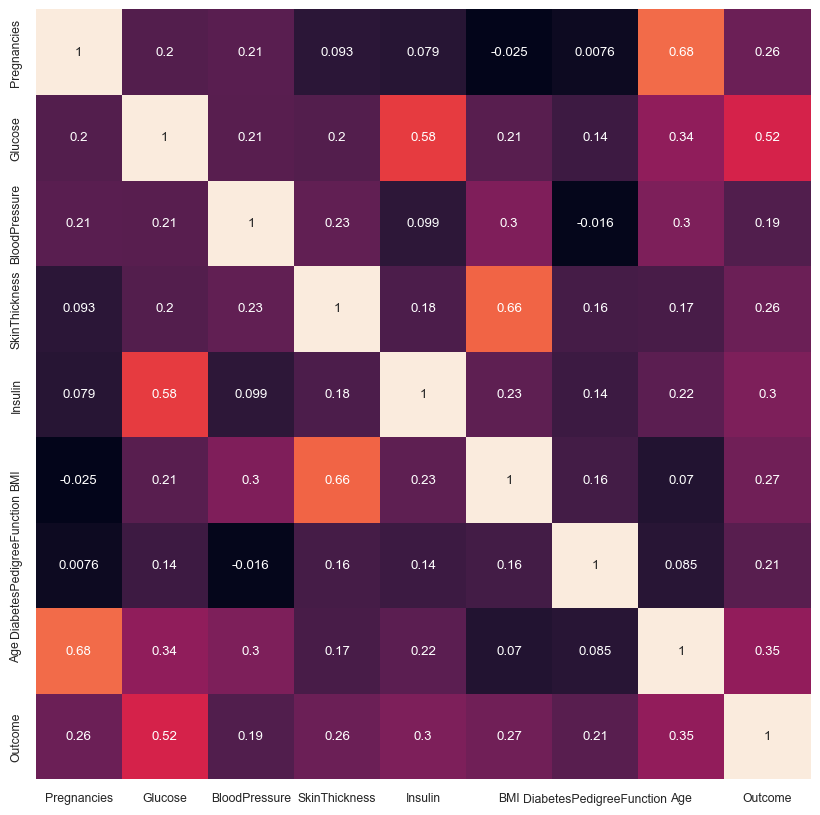

In [244]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
df_corr=df.corr()

#히트맵
plt.figure(figsize=(10,10))
sns.set(font_scale=0.8)
sns.heatmap(df_corr, annot=True, cbar=False)
plt.show()

In [245]:
X = df.drop(['Outcome', 'BMI'], axis=1)
y = df['BMI']
y.head()

3     28.1
4     43.1
6     31.0
8     30.5
13    30.1
Name: BMI, dtype: float64

In [246]:
X

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,DiabetesPedigreeFunction,Age
3,1,89,66,23,94,0.167,21
4,0,137,40,35,168,2.288,33
6,3,78,50,32,88,0.248,26
8,2,197,70,45,543,0.158,53
13,1,189,60,23,846,0.398,59
...,...,...,...,...,...,...,...
753,0,181,88,44,510,0.222,26
755,1,128,88,39,110,1.057,37
760,2,88,58,26,16,0.766,22
763,10,101,76,48,180,0.171,63


In [247]:
X_train, X_test, y_train, y_test=train_test_split(X,
                                                  y,
                                                  test_size=0.2,
                                                  shuffle=True,
                                                  random_state=12)

### Linear 회귀

In [248]:
model = LinearRegression()
model.fit(X_train, y_train)
ly_preds = model.predict(X_test)

def mse_np(actual, predicted):
    return np.mean((np.array(actual) - np.array(predicted)) ** 2)
def mse(actual, predicted):
    sum_square_error = sum((a - p) ** 2 for a, p in zip(actual, predicted))
    mean_square_error = sum_square_error / len(actual)
    return mean_square_error
    
print('평균제곱근오차', mean_squared_error(ly_preds, y_test))
print('평균제곱근오차', mse_np(ly_preds, y_test))
print('평균제곱근오차', mse(ly_preds, y_test))

평균제곱근오차 25.41351013059888
평균제곱근오차 25.41351013059888
평균제곱근오차 25.41351013059888


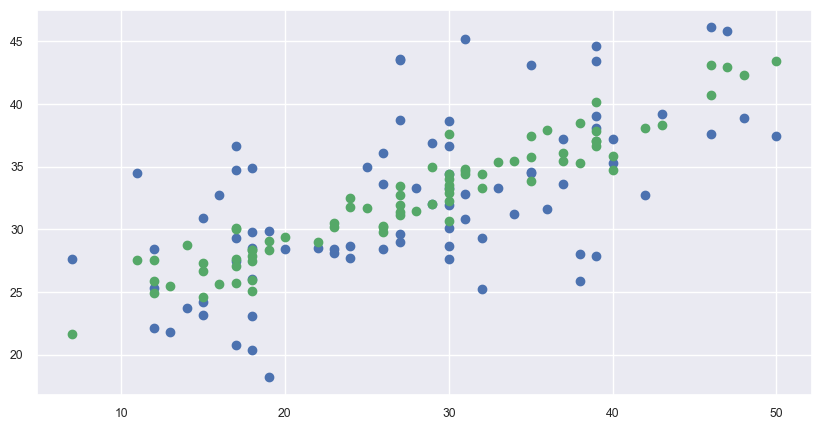

In [249]:
plt.figure(figsize=(10,5))
plt.scatter(X_test['SkinThickness'], y_test, label='y_test')
plt.scatter(X_test['SkinThickness'], ly_preds, c='g', label='ly_preds')
plt.show()   

### Decision Tree 회귀

In [250]:
from sklearn.tree import DecisionTreeRegressor

model = DecisionTreeRegressor()
model.fit(X_train, y_train)

dy_preds = model.predict(X_test)
print('평균제곱근오차', mean_squared_error(dy_preds, y_test))

평균제곱근오차 52.98291139240507


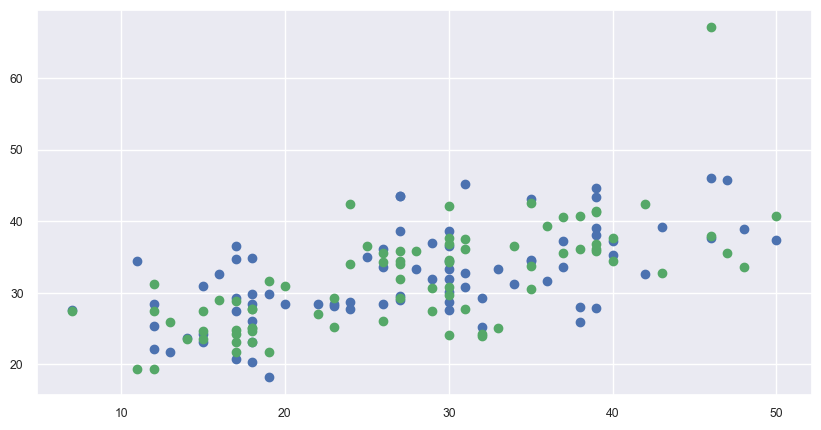

In [251]:
plt.figure(figsize=(10,5))
plt.scatter(X_test['SkinThickness'], y_test, label='y_test')
plt.scatter(X_test['SkinThickness'], dy_preds, c='g', label='dy_preds')
plt.show()   

### Random Forest 회귀

In [252]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()
model.fit(X_train, y_train)
ry_preds = model.predict(X_test)
print('평균제곱근오차', mean_squared_error(ry_preds, y_test))

평균제곱근오차 31.89943116455699


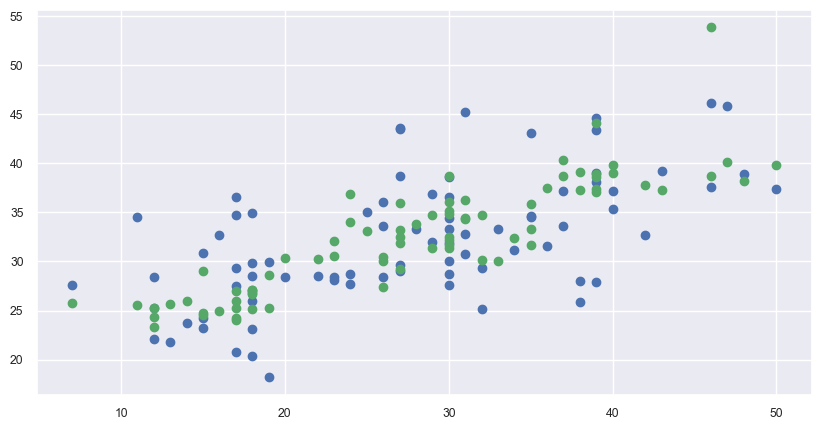

In [253]:
plt.figure(figsize=(10,5))
plt.scatter(X_test['SkinThickness'], y_test, label='y_test')
plt.scatter(X_test['SkinThickness'], ry_preds, c='g', label='ry_preds')
plt.show()  

### SVR 회귀

In [254]:
from sklearn.svm import SVR

model = SVR(kernel='linear')
model.fit(X_train, y_train)
ry_preds = model.predict(X_test)
print('평균제곱근오차', mean_squared_error(ry_preds, y_test))

평균제곱근오차 25.29903696270246


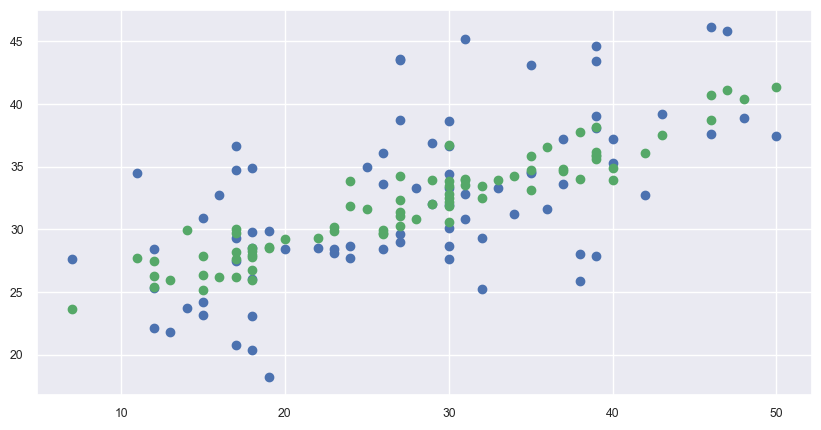

In [255]:
plt.figure(figsize=(10,5))
plt.scatter(X_test['SkinThickness'], y_test, label='y_test')
plt.scatter(X_test['SkinThickness'], ry_preds, c='g', label='ly_preds')
plt.show()  

## 4. 3번과 동일하지만 dense layer만 사용한 신경만으로 회귀를 수행하라.

In [256]:
y = df['BMI']
Y = pd.get_dummies(y).values
Y

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

In [257]:
X = df.drop(['Outcome', 'BMI'], axis=1)
X = X.values
X

array([[1.000e+00, 8.900e+01, 6.600e+01, ..., 9.400e+01, 1.670e-01,
        2.100e+01],
       [0.000e+00, 1.370e+02, 4.000e+01, ..., 1.680e+02, 2.288e+00,
        3.300e+01],
       [3.000e+00, 7.800e+01, 5.000e+01, ..., 8.800e+01, 2.480e-01,
        2.600e+01],
       ...,
       [2.000e+00, 8.800e+01, 5.800e+01, ..., 1.600e+01, 7.660e-01,
        2.200e+01],
       [1.000e+01, 1.010e+02, 7.600e+01, ..., 1.800e+02, 1.710e-01,
        6.300e+01],
       [5.000e+00, 1.210e+02, 7.200e+01, ..., 1.120e+02, 2.450e-01,
        3.000e+01]])

In [258]:
X_train,X_test, y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=0) 

In [259]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD,Adam

model = Sequential()

model.add(Dense(8,input_shape=(7,),activation='tanh'))
model.add(Dense(30,activation='tanh'))
model.add(Dense(30,activation='tanh'))
model.add(Dense(1))

model.compile(optimizer = 'rmsprop', loss = 'mse', metrics = ['mse'])

model.summary()

Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_68 (Dense)            (None, 8)                 64        
                                                                 
 dense_69 (Dense)            (None, 30)                270       
                                                                 
 dense_70 (Dense)            (None, 30)                930       
                                                                 
 dense_71 (Dense)            (None, 1)                 31        
                                                                 
Total params: 1,295
Trainable params: 1,295
Non-trainable params: 0
_________________________________________________________________


In [260]:
N_EPOCHS = 20

history=model.fit(x=X_train, y=y_train, epochs=N_EPOCHS, batch_size=32,validation_data= (X_test,y_test))
y_pred = model.predict(X_test)

Epoch 1/20
10/10 [==============================] - 0s 10ms/step - loss: 0.0680 - mse: 0.0680 - val_loss: 0.0093 - val_mse: 0.0093
Epoch 2/20
10/10 [==============================] - 0s 3ms/step - loss: 0.0093 - mse: 0.0093 - val_loss: 0.0068 - val_mse: 0.0068
Epoch 3/20
10/10 [==============================] - 0s 3ms/step - loss: 0.0067 - mse: 0.0067 - val_loss: 0.0069 - val_mse: 0.0069
Epoch 4/20
10/10 [==============================] - 0s 3ms/step - loss: 0.0086 - mse: 0.0086 - val_loss: 0.0079 - val_mse: 0.0079
Epoch 5/20
10/10 [==============================] - 0s 3ms/step - loss: 0.0072 - mse: 0.0072 - val_loss: 0.0089 - val_mse: 0.0089
Epoch 6/20
10/10 [==============================] - 0s 3ms/step - loss: 0.0079 - mse: 0.0079 - val_loss: 0.0077 - val_mse: 0.0077
Epoch 7/20
10/10 [==============================] - 0s 3ms/step - loss: 0.0083 - mse: 0.0083 - val_loss: 0.0069 - val_mse: 0.0069
Epoch 8/20
10/10 [==============================] - 0s 3ms/step - loss: 0.0074 - mse: 0.0

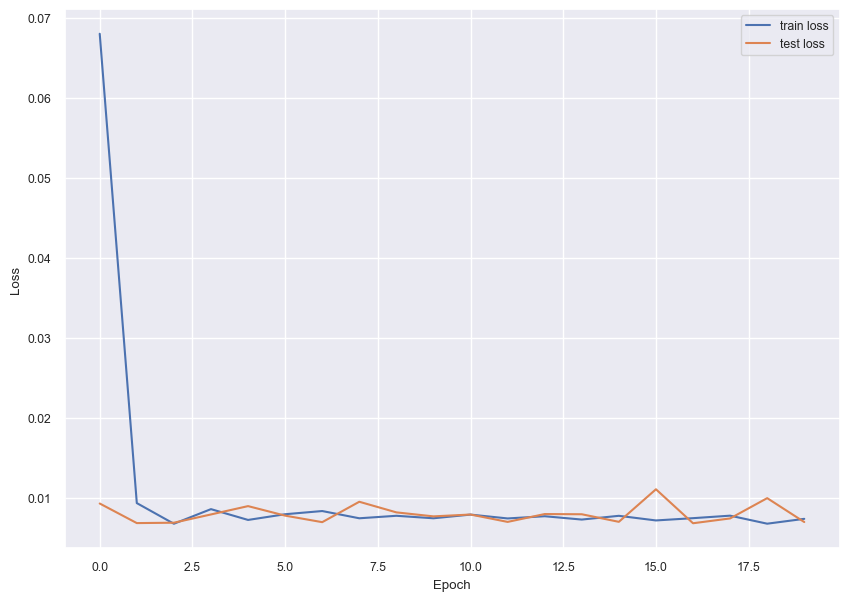

In [261]:
plt.figure(figsize=(10,7))
plt.plot(range(N_EPOCHS), history.history['loss'], label='train loss')
plt.plot(range(N_EPOCHS), history.history['val_loss'], label='test loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [262]:
model.evaluate(X_test, y_test)

3/3 [==============================] - 0s 955us/step - loss: 0.0069 - mse: 0.0069


[0.006937640253454447, 0.006937640253454447]